In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("gender_classification.csv")

In [3]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

<Axes: xlabel='long_hair', ylabel='Count'>

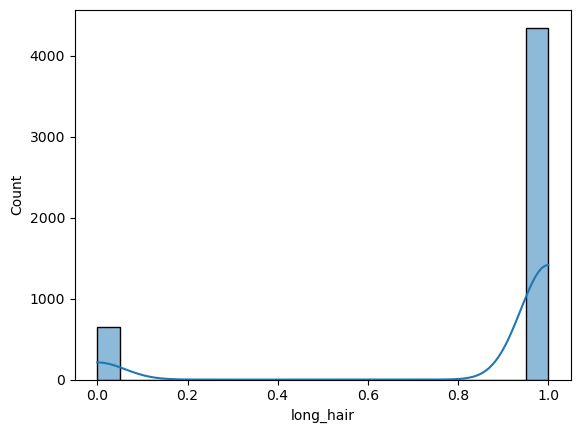

In [8]:
sns.histplot(df["long_hair"],bins=20,kde=True)

<Axes: xlabel='forehead_width_cm', ylabel='Count'>

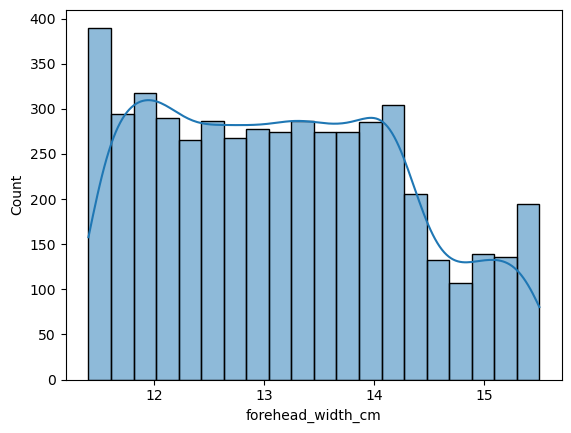

In [9]:
sns.histplot(df["forehead_width_cm"],bins=20,kde=True)

<Axes: xlabel='forehead_height_cm', ylabel='Count'>

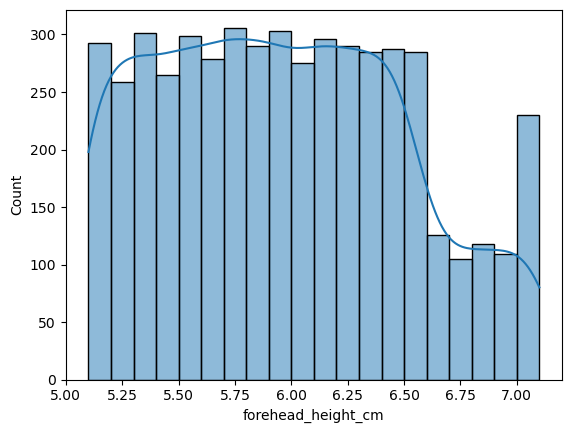

In [10]:
sns.histplot(df["forehead_height_cm"],bins=20,kde=True)

<Axes: xlabel='nose_wide', ylabel='Count'>

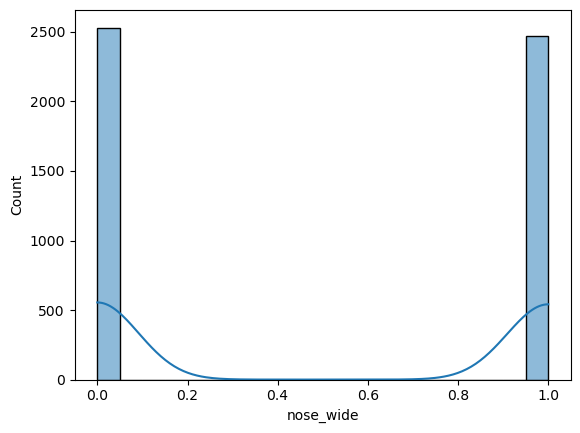

In [11]:
sns.histplot(df["nose_wide"],bins=20,kde=True)

<Axes: xlabel='nose_long', ylabel='Count'>

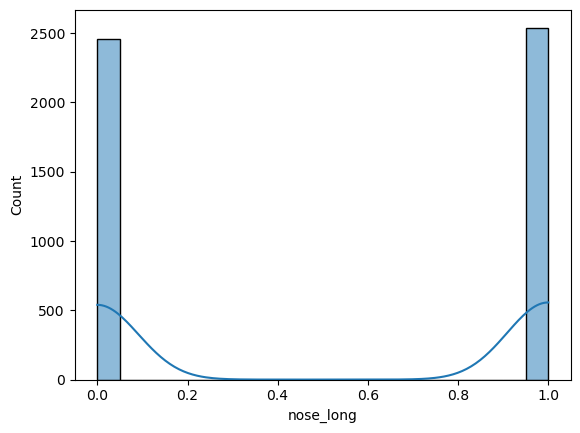

In [12]:
sns.histplot(df["nose_long"],bins=20,kde=True)

<Axes: xlabel='lips_thin', ylabel='Count'>

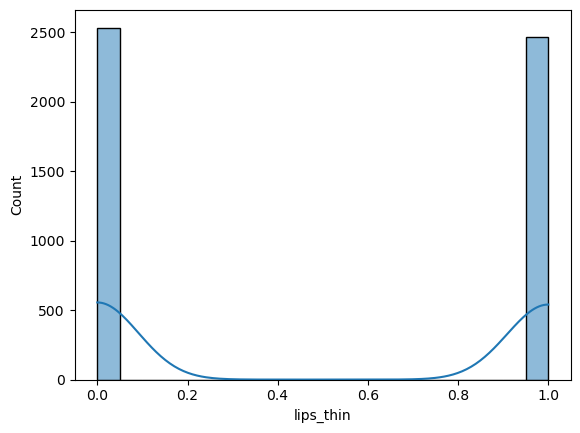

In [13]:
sns.histplot(df["lips_thin"],bins=20,kde=True)

<Axes: xlabel='distance_nose_to_lip_long', ylabel='Count'>

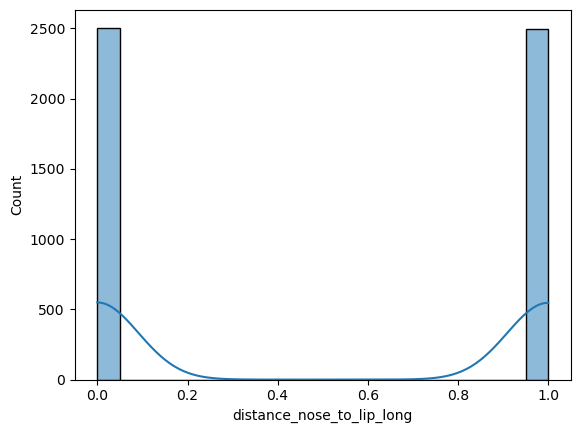

In [14]:
sns.histplot(df["distance_nose_to_lip_long"],bins=20,kde=True)

In [15]:
columns =['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    LOWER_BOUND=Q1-1.5*IQR
    UPPER_BOUND=Q3+1.5*IQR
    outliers = df[(df[col] < LOWER_BOUND) | (df[col] > UPPER_BOUND)]
    print(outliers.shape)

(652, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)


In [16]:
df[col]=df[col].clip(lower=LOWER_BOUND,upper=UPPER_BOUND)

In [17]:
print(outliers.shape)

(0, 8)


<Figure size 1200x1400 with 0 Axes>

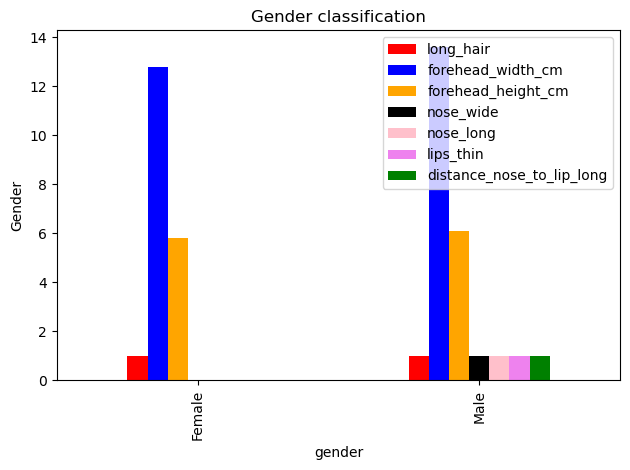

In [22]:
colors = ['red','blue','orange','black','pink','violet','green']
plt.figure(figsize=(12,14))
avg_scores_by_gender = df.groupby("gender")[['long_hair','forehead_width_cm', 'forehead_height_cm','nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long']].median().reset_index()
avg_scores_by_gender.set_index("gender").plot(kind='bar',color=colors,width=.5)
plt.title("Gender classification")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

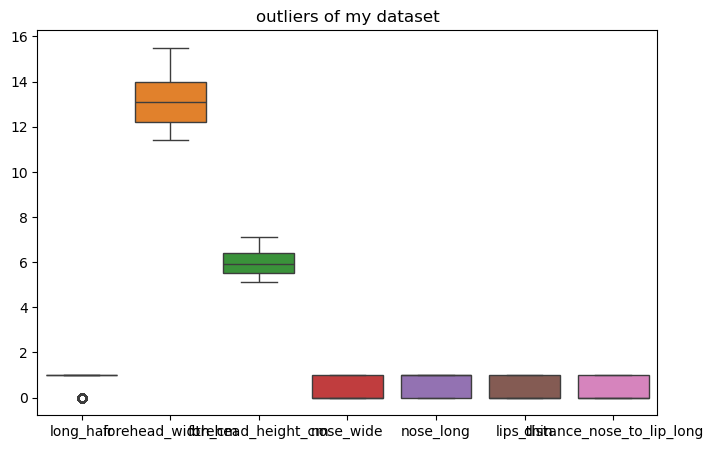

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title("outliers of my dataset")
plt.show()

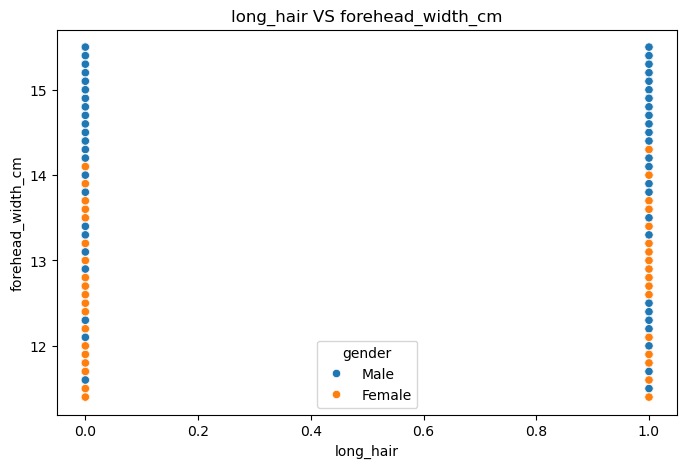

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df ,x='long_hair',y='forehead_width_cm',hue='gender')
plt.title("long_hair VS forehead_width_cm")
plt.show()

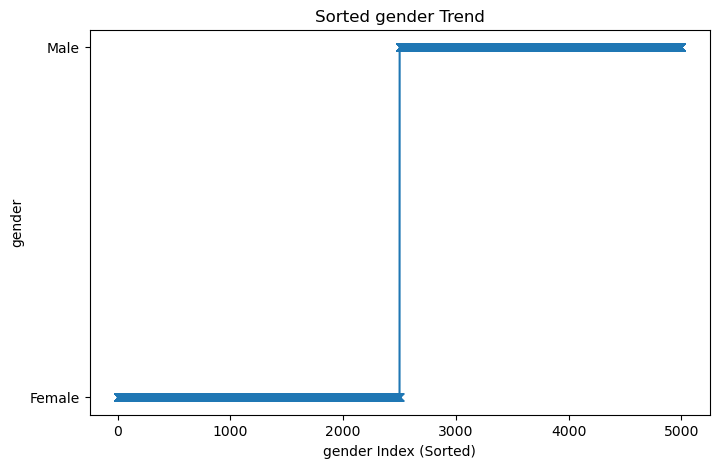

In [25]:
plt.figure(figsize=(8,5))
df_sorted  = df.sort_values(by='gender')
plt.plot(df_sorted['gender'].values,marker='x',linestyle='-')
plt.title('Sorted gender Trend')
plt.xlabel("gender Index (Sorted)")
plt.ylabel("gender")
plt.show()